<a href="https://colab.research.google.com/github/sdecarlini/ds2_preentrega1/blob/main/Pre_Entrega1_DS2_Decarlini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science II: Pre-entrega 1
Santiago Decarlini

## Abstracto

Este estudio tiene como objetivo analizar el conjunto de datos 'Global Superstore' para identificar patrones de compra y preferencias de los clientes, con el fin de optimizar las estrategias de marketing y ventas de la empresa.

A través de un análisis exploratorio de datos, se busca responder a preguntas clave relacionadas con la segmentación de clientes, las categorías de productos más populares y la distribución geográfica de las ventas.

Los resultados de este análisis proporcionarán valiosos insights para los equipos de marketing y ventas, permitiendo una segmentación más precisa de los clientes y una mejor asignación de recursos. Al comprender mejor las necesidades y preferencias de los clientes, la empresa podrá desarrollar campañas de marketing más efectivas, y capitalizar oportunidades únicas por mercado.

### Preguntas / Hipótesis

Se presentan las siguientes preguntas que motivan la investigación:


---


**Segmento de cliente:**
- ¿Existen diferencias significativas en el comportamiento de compra entre los segmentos?
- ¿Qué productos son más populares en cada segmento?
- ¿Cuál es el ticket promedio por compra en cada segmento?


---


**Categoría de producto:**
- ¿Qué categorías de productos generan los mayores ingresos?
- ¿Existe alguna relación entre las categorías de productos y los segmentos de clientes?
- ¿Hay productos que se venden frecuentemente juntos (bundles)?


---


**Mercado:**
- ¿Cuál es la distribución geográfica de las ventas?
- ¿Existen mercados con mayor potencial de crecimiento?
- ¿Hay diferencias significativas en los hábitos de compra entre los diferentes países o regiones?


---


### Objetivos

- Identificar tendencias de consumo para mejorar la estrategia comercial: Analizar los patrones de compra de los clientes para descubrir tendencias de consumo significativas y ajustar la estrategia comercial en términos de productos, precios, marketing e inventario

- Mejorar el rendimiento de las categorías: Identificar los productos y categorías de productos más vendidos para enfocar los esfuerzos de marketing y las estrategias de gestión de inventario.

- Maximizar la rentabilidad: Aumentar la rentabilidad general optimizando las estrategias de precios, aplicando descuentos de forma eficiente y reduciendo los costos operativos.

- Mejorar la penetración en el mercado: Ampliar el alcance del mercado identificando oportunidades de crecimiento potencial en regiones o categorías de productos con sub-rendimientos.

## Carga de datos

Para el presente trabajo se utilizó un dataset de Kaggle “[Global Superstore: Statistical Analysis and Visualization](https://www.kaggle.com/datasets/shekpaul/global-superstore/data)”, una simulación de operaciones de ventas de retail de una empresa de artículos de oficina, con venta en múltiples países. El conjunto de datos utilizado ofrece una panorámica detallada de las transacciones comerciales, incluyendo información sobre clientes, órdenes y productos.

In [1]:
#librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# Carga de datos
url = 'https://raw.githubusercontent.com/sdecarlini/ds2_preentrega1/main/Global%20Superstore.xls'
df = pd.read_excel(url)
# guarda el df como un CSV
df.to_csv('Global_Superstore.csv', index=False)

## Descripción inicial del dataset

In [3]:
# shape
print("Columnas:", df.shape[1])
print("Filas:", df.shape[0])

Columnas: 24
Filas: 51290


In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium
51289,6147,MX-2012-134460,2012-05-22,2012-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.002,High


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [7]:
df.dtypes.value_counts()

,count
object,15
float64,5
int64,2
datetime64[ns],2


In [8]:
#columns
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

Resumen estadístico

In [9]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [10]:
#se incluyen las variables categóricas
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,NaN,NaN,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,NaN,NaN,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,NaN,NaN,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375818,NaN
min,1.00000,NaN,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.002000,NaN
25%,12823.25000,NaN,2012-06-19 00:00:00,2012-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,2013-07-08 00:00:00,2013-07-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,2014-05-22 00:00:00,2014-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN
max,51290.00000,NaN,2014-12-31 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.850000,8399.976000,933.570000,NaN


In [11]:
# Resumen estadístico, con ancho de visualización ajustado
# para que se vean todas las columnas
pd.set_option('display.max_columns', None)
print(df.describe(include='all'))

             Row ID        Order ID                     Order Date  \
count   51290.00000           51290                          51290   
unique          NaN           25035                            NaN   
top             NaN  CA-2014-100111                            NaN   
freq            NaN              14                            NaN   
mean    25645.50000             NaN  2013-05-11 21:26:49.155781120   
min         1.00000             NaN            2011-01-01 00:00:00   
25%     12823.25000             NaN            2012-06-19 00:00:00   
50%     25645.50000             NaN            2013-07-08 00:00:00   
75%     38467.75000             NaN            2014-05-22 00:00:00   
max     51290.00000             NaN            2014-12-31 00:00:00   
std     14806.29199             NaN                            NaN   

                            Ship Date       Ship Mode Customer ID  \
count                           51290           51290       51290   
unique               

## Metadatos



**Resumen general:**
- El dataset cuenta con 24 columnas y 51290 filas.
- Del total de 24 columnas, únicamente una ("Postal Code") cuenta con datos nulos. Esto se debe posiblemente a que sólo los clientes de USA cuentan con un código postal declarado. Se determina eliminar esta columna del análisis.
- Columnas de identificación: Row ID, Order ID, Customer ID, Product ID, Postal Code
- Columnas numéricas: Sales, Quantity, Discount, Profit, Shipping Cost
- Columnas categóricas: Ship Mode, Segment, Country, Market, Region, Category, Sub-Category, Order Priority
- Las fechas están en formato YYYY-MM-DD.

**Descripción de variables:**
- Row ID: Identificador único de cada fila/transacción
- Order ID: Identificador único para cada pedido
- Order Date: Fecha en la que se realizó el pedido
- Ship Date: Fecha en la que se envió el pedido
-Ship Mode: Método utilizado para enviar el pedido (ej. Express, Estándar, etc)
- Customer ID: Identificador único para cada cliente
- Customer Name: Nombre del cliente
- Segment: Segmento del cliente (ej. Consumidor, Corporate, etc)
- City: Ciudad donde reside el cliente
- State: Estado donde reside el cliente
- Country: País donde reside el cliente
- Postal Code: Código postal de la residencia del cliente (sólo disponible para clientes de USA)
- Market: Mercado o Unidad de Negocios
- Region: Región geográfica donde reside el cliente
- Product ID: Identificador único para cada producto
- Category: Categoría amplia del producto (ej. Muebles, suministros de oficina, tecnología)
- Sub-Category: Sub-categoría específica del producto
- Product Name: Nombre del producto
- Sales: Ingresos totales por la venta del producto
- Quantity: Número de unidades del producto vendidas
- Discount: Descuento aplicado al producto
- Profit: Ganancia total obtenida del producto
- Shipping Cost: Costo del envío del producto
- Order Priority: Nivel de prioridad de la orden


### Observaciones del resumen estadístico

> **Row ID, Order ID**:
Estos son identificadores únicos, y no requieren un análisis estadístico en profundidad. Sin embargo, el conteo nos indica que contamos 51,290 transacciones, y 25,035 órdenes únicas.

> **Order Date, Ship Date**:
Estas fechas nos dan una idea del período de tiempo cubierto por los datos, y la rapidez con la que se procesan los pedidos. Los pedidos se realizaron entre enero de 2011 y diciembre de 2014, cubriendo un período de casi cuatro años.

> **Customer ID, Customer Name**: Hay 1590 clientes únicos en el dataset. El hecho de que "Muhammed Yedwab" sea el cliente que aparece con más frecuencia (108 veces) sugiere que este cliente es un comprador habitual o un cliente mayorista.

> **Segment**: El segmento "Consumer" es el más dominante, lo que indica que la mayor parte de las ventas se realizan a consumidores individuales.

> **City, State, Country**: La mayoría de los pedidos se realizaron en los Estados Unidos. Analizando los resultados de State y City podemos detectar un **error en los datos**, ya que evidentemente "New York City" no se encuentra en el estado de California. Dado que dichas columnas (*State, City*) no pueden asegurar una integridad, no serán consideradas para el análisis, y por lo tanto removidas del dataframe en la siguiente fase de limpieza del set de datos.

> **Product ID, Category, Sub-Category**: La categoría "Office Supplies" es la más vendida, y el producto "Staples" es el más popular. Esto sugiere que los suministros de oficina son la línea de productos principal, respaldado por el hecho de que la sub-categoría más vendida fue "Binders".

> **Sales**:
El valor promedio de las ventas (ticket promedio) en el período fue de 246.49, y la venta más alta registrada tuvo un valor de 22,638. El valor mínimo fue de 0.4; aún sin determinar si se trata de una anomalía, o de un producto de muy bajo costo. La desviación estándar de esta variable es alta, lo que indica que hay una gran variabilidad en los valores de venta (cosa esperable de una compañía que vende un gran rango de productos).

> **Quantity**:
Los usuarios compran un promedio de 3.48 unidades por orden, y la orden con mayor cantidad de unidades vendidas fue de 14. De forma esperable, el mínimo registrado en la columna es 1, ya que se requiere al menos una unidad para que la venta sea válida.

> **Discount**:
El descuento promedio es de 14.29%, lo que sugiere que los descuentos son una estrategia de ventas común. El máximo descuento registrado fue de 85%, y el mínimo en 0% (de forma esperable, ya que aplicar un descuento en todas las ventas no representa un modelo de negocios viable en el largo plazo). La desviación estándar indica que hay una variabilidad en los descuentos aplicados.

> **Profit**:
La ganancia promedio es de $28.61, lo que sugiere que en general las ventas son rentables. Sin embargo, el valor mínimo negativo indica que hay pedidos que generaron pérdidas.

> **Shipping Cost**:
El costo de envío promedio fue de 26.38 y la orden con el costo de envío más alto fue de 933. Se encontró un valor mínimo de 0.002; aún no he determinado si se trata de una anomalía, o de un producto intangible o de muy bajo peso, con un costo de envío despreciable (ej. licencias de productos digitales, microchips, tarjetas de memoria, etc). La alta desviación de los datos es esperable, dado el rango de productos de distintas categorías vendidos por la empresa.

> **Logística y envíos**:
El método de envío más utilizado fue "Standard Class", mientras que el Order Priority más utilizado fue "Medium".



## Data Wrangling

### Limpieza de datos

In [12]:
#Identificacion de duplicados
df.duplicated().sum()

0

In [13]:
## Identificación de valores nulos
df.isnull().sum()
print(df.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Se eliminarán las siguientes columnas:
- RowID: No aporta valor significativo más que el ID único de cada fila.
- Postal Code: Posee gran cantidad de valores nulos. Si bien podría enriquecerse, no es el foco del presente análisis.
- State: Posee errores.
- City, Product Name, Customer Name: Poseen muchos valores únicos y no son relevantes para el presente análisis.


In [14]:
# Eliminamos las columnas del dataframe
df = df.drop(['Row ID', 'Postal Code', 'State', 'City', 'Product Name', 'Customer Name'], axis=1)

In [15]:
#revisión de cambios
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,Market,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,United States,US,East,TEC-AC-10003033,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Consumer,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical


### Estandarización del nombre de variables

In [16]:
# Pasamos a lowercase y usamos guión bajo como separador
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'segment', 'country', 'market', 'region', 'product_id', 'category',
       'sub-category', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')


In [17]:
# Renombramos "sub-category" que escapó el filtro anterior
df = df.rename(columns={'sub-category': 'sub_category'})
print(df.columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'segment', 'country', 'market', 'region', 'product_id', 'category',
       'sub_category', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')


In [18]:
# Revisión de cambios
columns = df.columns
print(columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'segment', 'country', 'market', 'region', 'product_id', 'category',
       'sub_category', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')


### Ajuste en el formato de fecha

In [19]:
# Pasamos a un formato YYYY-MM-DD, eliminando HH-MM-SS
df['order_date'] = pd.to_datetime(df['order_date']).dt.date
df['ship_date'] = pd.to_datetime(df['ship_date']).dt.date

In [20]:
# Cambiamos las columnas order_date y ship_date a dtype de fecha
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [21]:
# revision de cambios de datatype
df.dtypes

,0
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
ship_mode,object
customer_id,object
segment,object
country,object
market,object
region,object
product_id,object


In [22]:
# Redondeamos los valores decimales
df['sales'] = df['sales'].round(2)
df['profit'] = df['profit'].round(2)
df['shipping_cost'] = df['shipping_cost'].round(2)
df['discount'] = df['discount'].round(4)

In [23]:
#revision
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,market,region,product_id,category,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,United States,US,East,TEC-AC-10003033,Technology,Accessories,2309.65,7,0.0,762.18,933.57,Critical
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,3709.39,9,0.1,-288.76,923.63,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,5175.17,9,0.1,919.97,915.49,Medium
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,2892.51,5,0.1,-96.54,910.16,Medium
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Consumer,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,2832.96,8,0.0,311.52,903.04,Critical


### Creación de nuevas columnas

In [24]:
# date columns (year, month, quarter, day, dayofweek)
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['quarter'] = df['order_date'].dt.quarter
df['day'] = df['order_date'].dt.day
df['dayofweek'] = df['order_date'].dt.dayofweek

In [25]:
#revision
df.head(5)


,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,market,region,product_id,category,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,quarter,day,dayofweek
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,United States,US,East,TEC-AC-10003033,Technology,Accessories,2309.65,7,0.0,762.18,933.57,Critical,2012,7,3,31,1
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,3709.39,9,0.1,-288.76,923.63,Critical,2013,2,1,5,1
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,5175.17,9,0.1,919.97,915.49,Medium,2013,10,4,17,3
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,2892.51,5,0.1,-96.54,910.16,Medium,2013,1,1,28,0
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Consumer,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,2832.96,8,0.0,311.52,903.04,Critical,2013,11,4,5,1


## EDA

In [26]:
# Definición de estilo
plt.style.use('fivethirtyeight')

# parámetros del gráfico
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10

# elementos del gráfico
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.titlesize'] = 12

### Correlación de variables

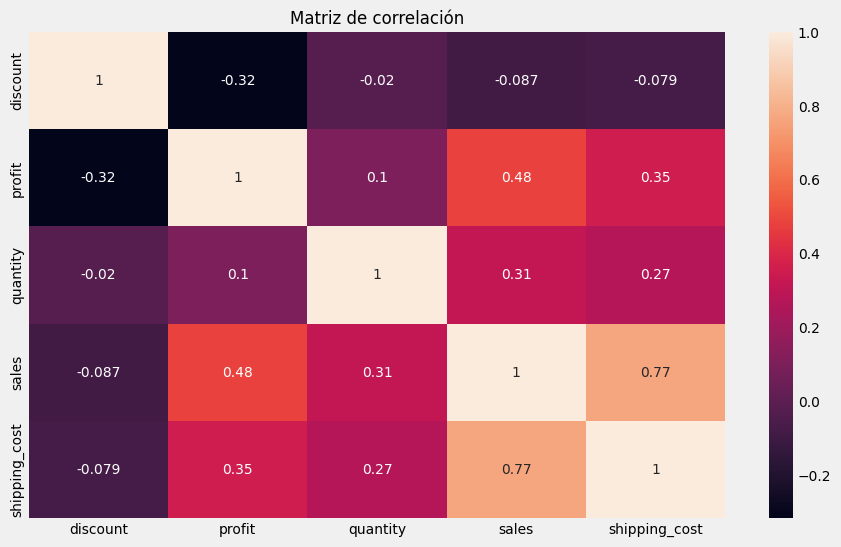

In [27]:
# Matriz de correlación
cols_to_exclude = ['year', 'month', 'quarter', 'day', 'dayofweek']
numeric_cols = df.select_dtypes(include=['number']).columns.difference(cols_to_exclude)
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación')
plt.show()

##### Correlaciones positivas fuertes:

- **Sales & Shipping Cost (0.768)**: Esta fuerte relación directa confirma que a mayor valor de la venta, mayor es el costo de envío. Esto es lógico, ya que pedidos de mayor valor suelen requerir envíos más grandes o con servicios adicionales, lo que incrementa el costo.

- **Sales & Profit (0.485)**: La correlación positiva moderada indica que a mayor valor de la venta, mayor es la ganancia. Sin embargo, otros factores como los descuentos pueden influir en esta relación.

##### Correlaciones positivas débiles:

- **Sales & Quantity (0.313)**: Aunque hay una correlación positiva, no es tan fuerte como la de Sales y Shipping Cost. Esto sugiere que mientras que un aumento en la cantidad vendida generalmente lleva a un aumento en el valor total de la venta, no es una relación lineal perfecta. Otros factores, como el precio unitario, pueden influir.

- **Quantity & Shipping Cost (0.273)**: Hay una ligera relación positiva. A mayor cantidad vendida, puede haber un ligero aumento en el costo de envío.

##### Correlación negativa:

- **Discount & Profit (-0.316)**: Una relación negativa indica que a mayor descuento, menor es la ganancia. Esto es lógico, ya que los descuentos reducen el margen de ganancia.

##### Observaciones adicionales:

- **Sales & Quantity**: Aunque hay una relación positiva, no es tan fuerte como cabría esperar. Esto podría indicar que existen productos con un alto valor unitario que se venden en pequeñas cantidades, o viceversa.

- **Discount & otras variables**: Los descuentos no parecen tener una correlación significativa con otras variables como el costo de envío o la cantidad vendida, lo que sugiere que la política de descuentos no está directamente relacionada con estos factores.

### Distribución

Dado que las columnas de profit, sales y shipping_cost cuentan con valores atípicos (profit negativo en algunos casos, ventas de mucho valor, etc) se calcula el rango intercuartílico, y se generan los lower y upper bounds para poder excluir los valores atípicos de algunos gráficos.

In [28]:
# Calcular el rango intercuartílico
Q1 = df[['profit', 'sales', 'shipping_cost']].quantile(0.25)
Q3 = df[['profit', 'sales', 'shipping_cost']].quantile(0.75)

# Calcular el IQR para cada columna
IQR = Q3 - Q1

# Imprimir los cuartiles y el IQR
print("Rango Intercuartílico:")
print(IQR)

Rango Intercuartílico:
profit            36.8100
sales            220.2925
shipping_cost     21.8400
dtype: float64


Distribución de las variables numéricas

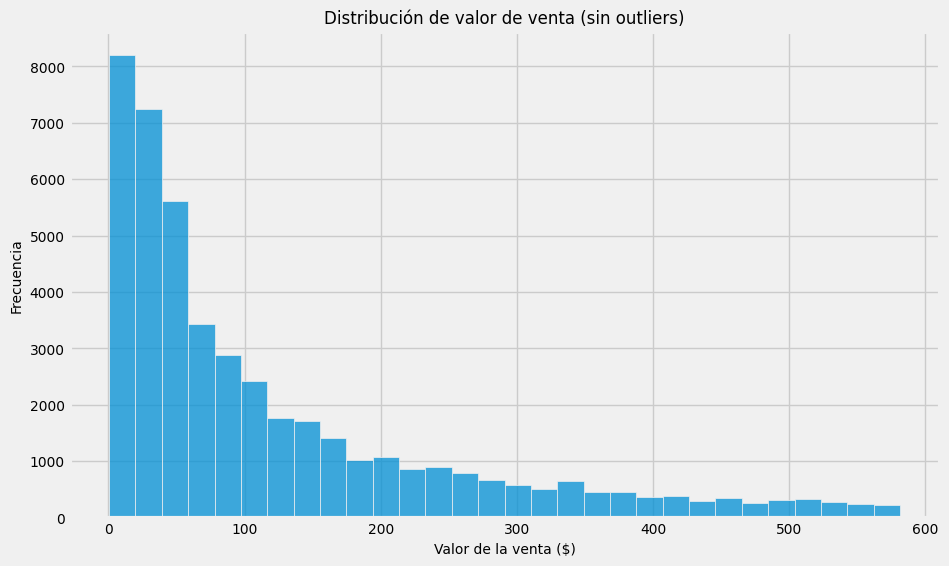

In [29]:
# SALES sin outliers
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]

sns.histplot(data=df_filtered, x='sales', bins=30)
plt.title('Distribución de valor de venta (sin outliers)')
plt.xlabel('Valor de la venta ($)')
plt.ylabel('Frecuencia')
plt.show()

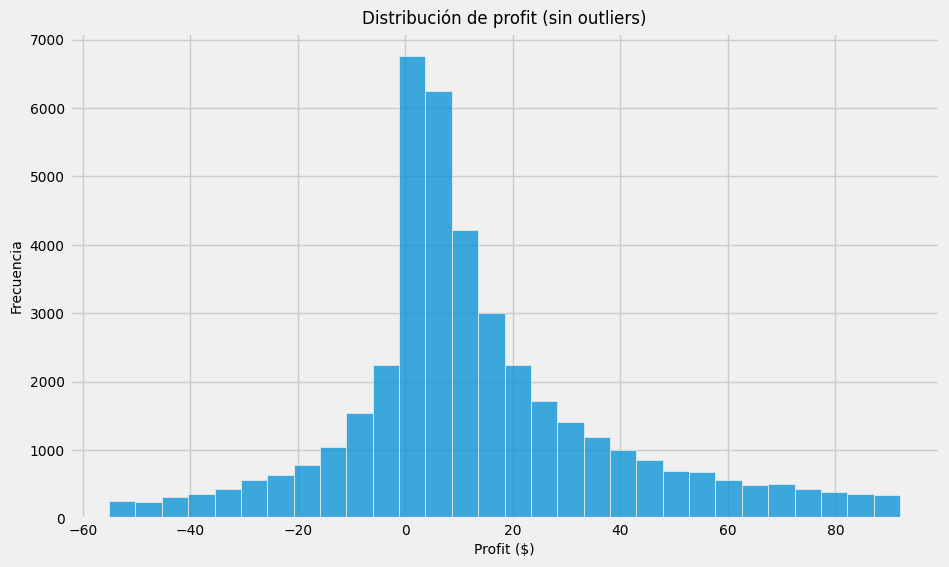

In [30]:
# hist de PROFIT sin outliers

Q1 = df['profit'].quantile(0.25)
Q3 = df['profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['profit'] >= lower_bound) & (df['profit'] <= upper_bound)]

sns.histplot(data=df_filtered, x='profit', bins=30)
plt.title('Distribución de profit (sin outliers)')
plt.xlabel('Profit ($)')
plt.ylabel('Frecuencia')
plt.show()

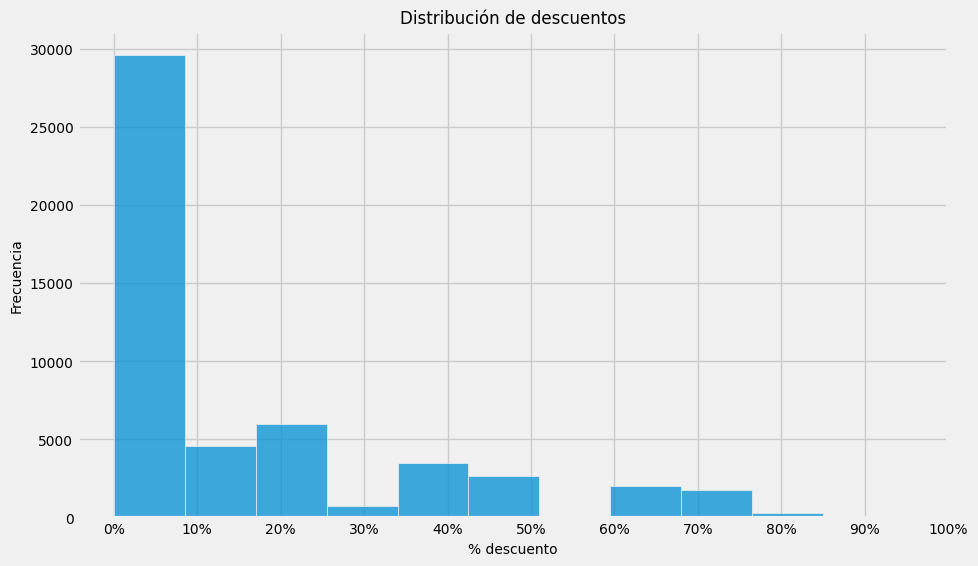

In [31]:
# Histograma de descuentos
sns.histplot(data=df, x='discount', bins=10)
plt.title('Distribución de descuentos')
plt.xlabel('% descuento')
plt.ylabel('Frecuencia')

# Formatear el eje x como porcentaje y ajustar los ticks
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=np.arange(0, 1.1, 0.1)) #Ajusta los ticks (0 a 1, paso de 0.1)

plt.show()

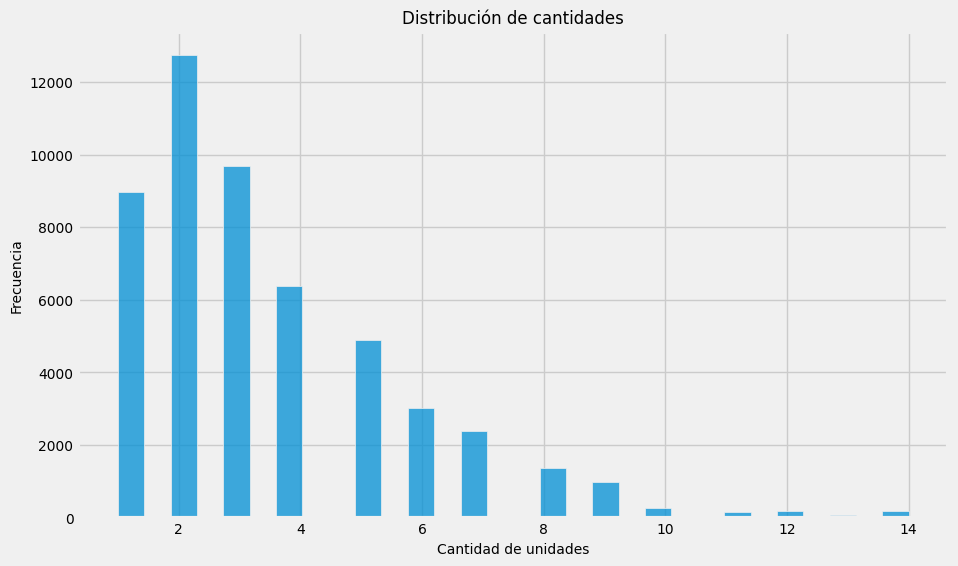

In [32]:
# Histograma de cantidad de unidades
sns.histplot(data=df, x='quantity', bins=30)
plt.title('Distribución de cantidades')
plt.xlabel('Cantidad de unidades')
plt.ylabel('Frecuencia')
plt.show()

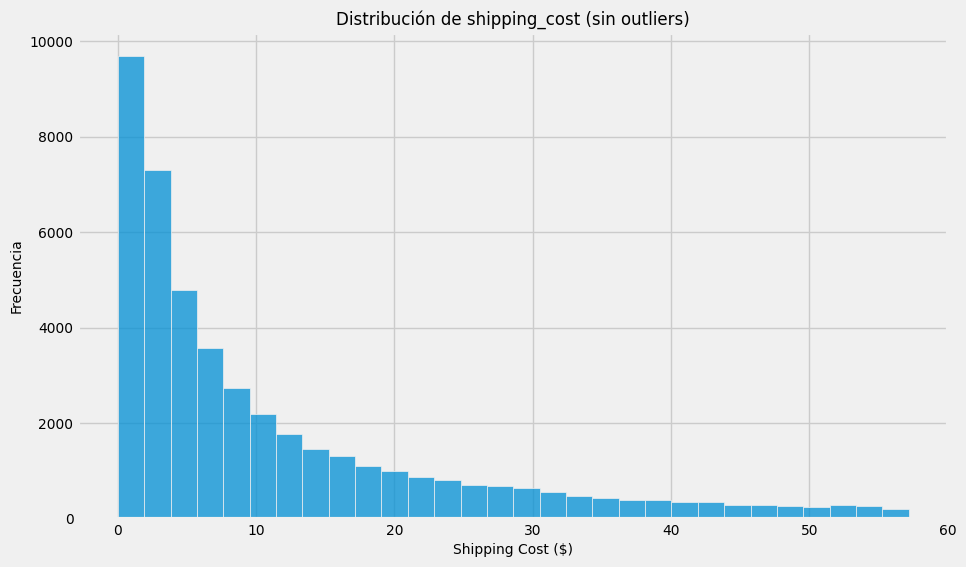

In [33]:
# Shipping Cost (sin outliers)
Q1 = df['shipping_cost'].quantile(0.25)
Q3 = df['shipping_cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['shipping_cost'] >= lower_bound) & (df['shipping_cost'] <= upper_bound)]

sns.histplot(data=df_filtered, x='shipping_cost', bins=30)
plt.title('Distribución de shipping_cost (sin outliers)')
plt.xlabel('Shipping Cost ($)')
plt.ylabel('Frecuencia')
plt.show()

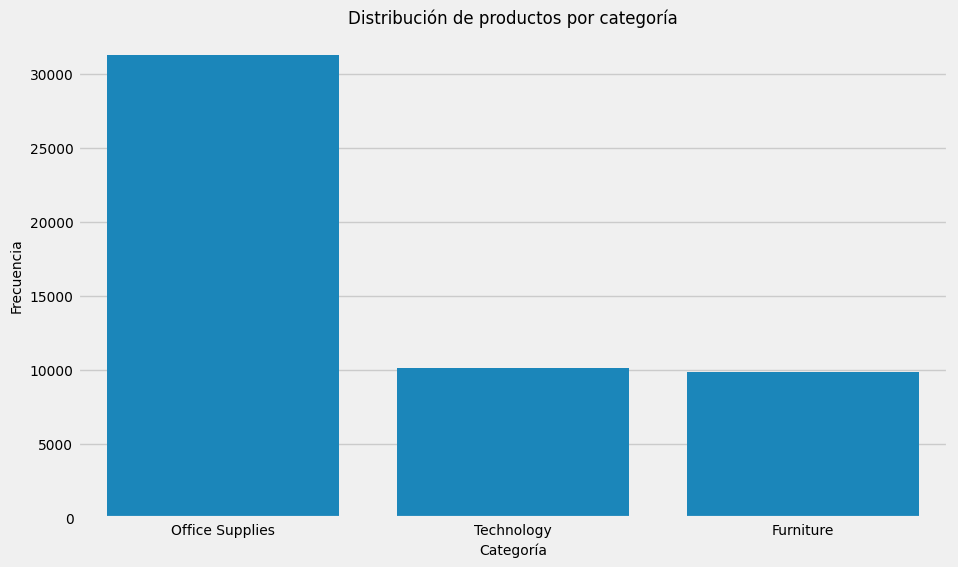

In [34]:
# Distribución de productos por categoría
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Distribución de productos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

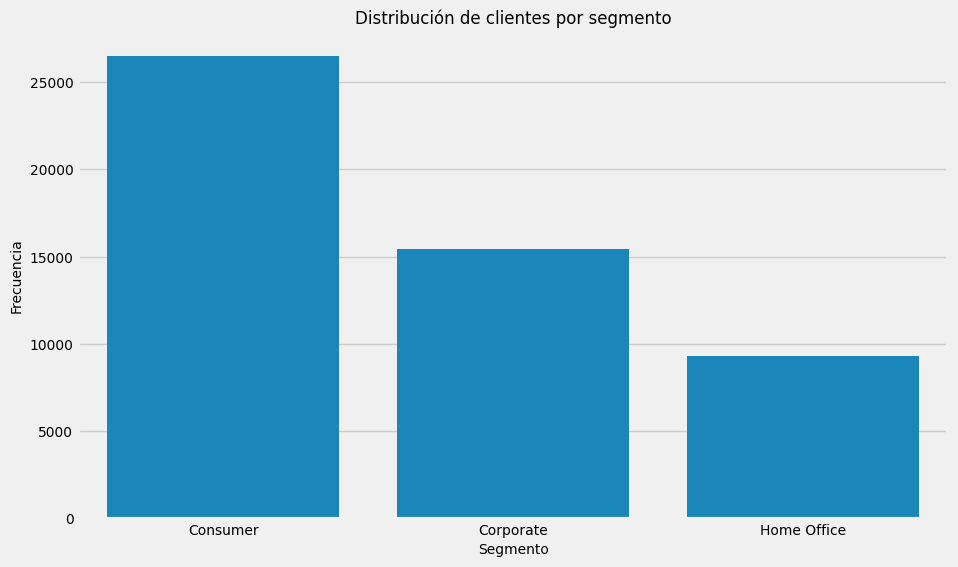

In [35]:
# Distribución de clientes por segmento
sns.countplot(data=df, x='segment', order=df['segment'].value_counts().index)
plt.title('Distribución de clientes por segmento')
plt.xlabel('Segmento')
plt.ylabel('Frecuencia')
plt.show()

### Análisis de mercados

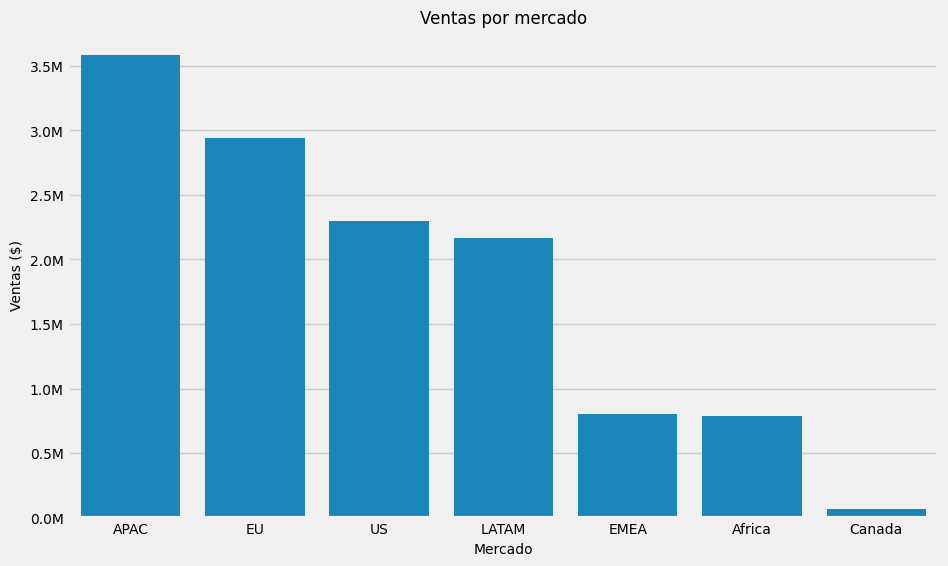

In [36]:
# Ventas por mercado
# df agrupado
df_summary = df.groupby(['market'])['sales'].sum().reset_index()
df_summary = df_summary.sort_values('sales', ascending=False)
order = df_summary['market'].tolist()

sns.barplot(data=df_summary, x='market', y='sales', order=order)
plt.title('Ventas por mercado')
plt.xlabel('Mercado')
plt.ylabel('Ventas ($)')

# Formatea el eje y para mostrar valores en millones
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6)))

# Muestra el gráfico
plt.show()

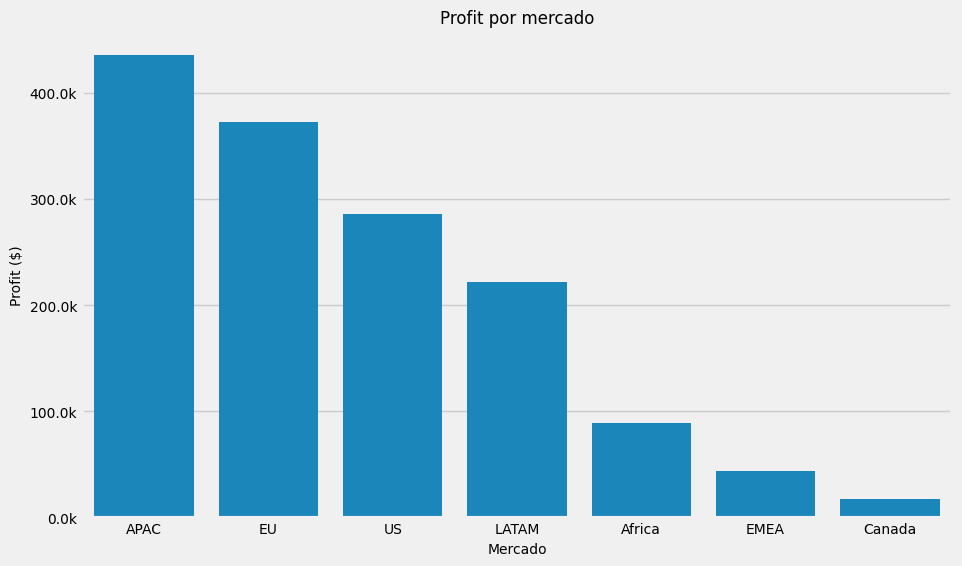

In [37]:
# profit por mercado
# df agrupado
df_summary = df.groupby(['market'])['profit'].sum().reset_index()
df_summary = df_summary.sort_values('profit', ascending=False)
order = df_summary['market'].tolist()

sns.barplot(data=df_summary, x='market', y='profit', order=order)
plt.title('Profit por mercado')
plt.xlabel('Mercado')
plt.ylabel('Profit ($)')

# Formatea el eje y
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.1f}k'.format(x/1e3)))
# Muestra el gráfico
plt.show()

Africa tiene casi las mismas ventas que EMEA, sin embargo duplica a dicho mercado en profit.


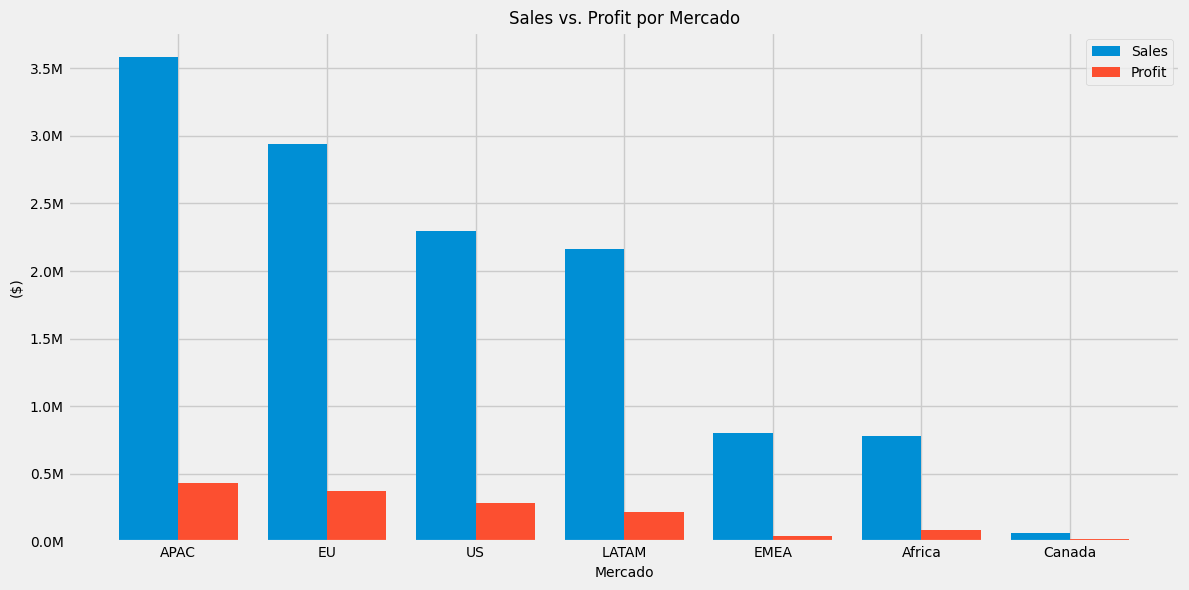

In [38]:
# sales vs. profit x mercado

df_summary = df.groupby('market')[['sales', 'profit']].sum().reset_index()
df_summary = df_summary.sort_values('sales', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(df_summary['market']))

ax.bar(index - bar_width / 2, df_summary['sales'], bar_width, label='Sales')
ax.bar(index + bar_width / 2, df_summary['profit'], bar_width, label='Profit')

ax.set_xlabel('Mercado')
ax.set_ylabel('($)')
ax.set_title('Sales vs. Profit por Mercado')
ax.set_xticks(index)
ax.set_xticklabels(df_summary['market'])
ax.legend()

# formato eje y (M)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6)))

plt.tight_layout()
plt.show()

EMEA presenta menos profit que Africa, posiblemente debido a que, en promedio, aplica descuentos más altos.

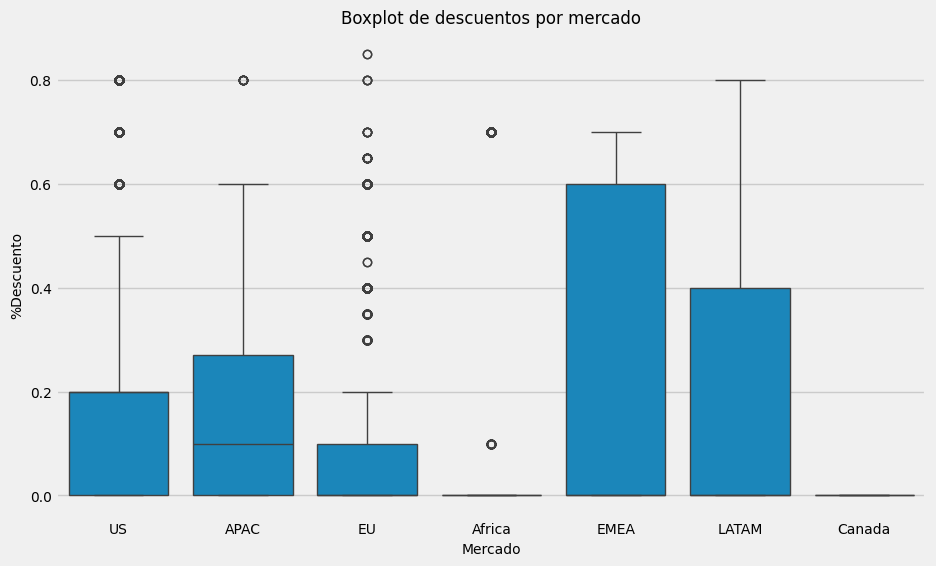

In [39]:
# Boxplot de descuentos por mercado
plt.figure(figsize=(10, 6))
sns.boxplot(x="market", y="discount", data=df)
plt.title("Boxplot de descuentos por mercado")
plt.xlabel("Mercado")
plt.ylabel("%Descuento")
plt.show()

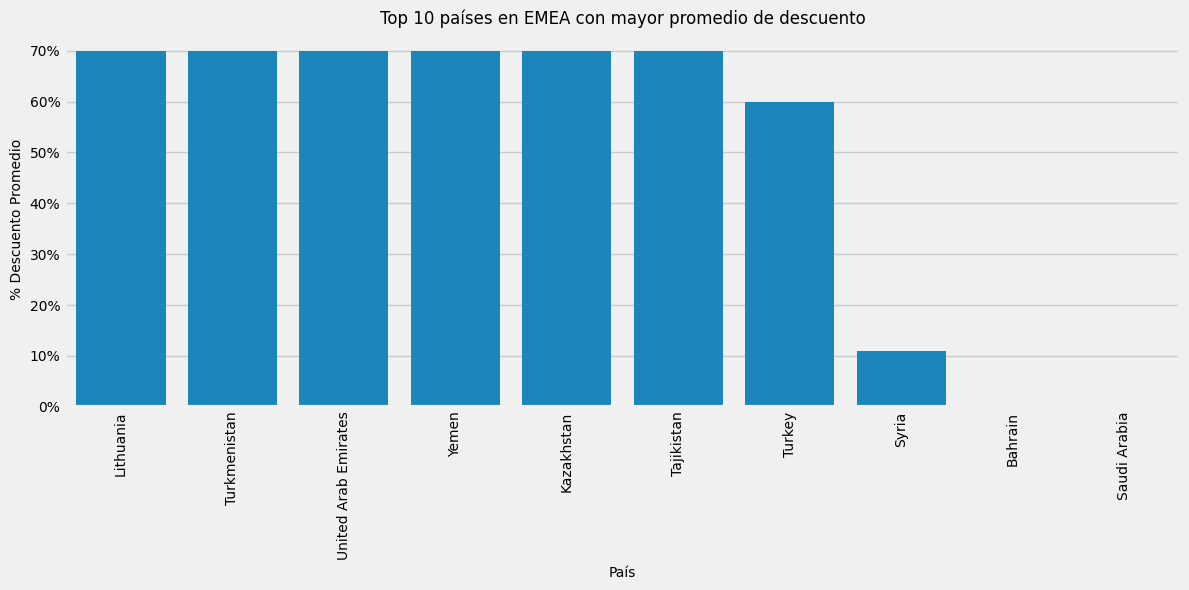

In [67]:
# Identificamos a los países de EMEA que más descuentos aplican en promedio

# Filtrar por el mercado EMEA
df_emea = df[df['market'] == 'EMEA']

# Agrupar por país y calcular el promedio de descuento dentro de EMEA
df_avg_discount_emea = df_emea.groupby('country')['discount'].mean().reset_index()

# Ordenar de mayor a menor promedio de descuento
df_avg_discount_emea = df_avg_discount_emea.sort_values('discount', ascending=False)

# Seleccionar los 10 primeros países
top_10_countries_emea = df_avg_discount_emea.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='discount', data=top_10_countries_emea)
plt.title('Top 10 países en EMEA con mayor promedio de descuento')
plt.xlabel('País')
plt.ylabel('% Descuento Promedio')
plt.xticks(rotation=45)

# mostrar el eje y con porcentajes
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

Identificamos que Lithuania, Turkmenistan, Emiratos Árabes, Yemen, Kazakhstan, Tajikistan y Turquía son los países de EMEA responsables del alto índice de descuentos aplicados por este mercado. Esto puede significar que estos mercados requieren más acciones promocionales para estimular a los consumidores, por lo que se recomienda evaluar el impacto incremental de los descuentos sobre las ventas en estos países.

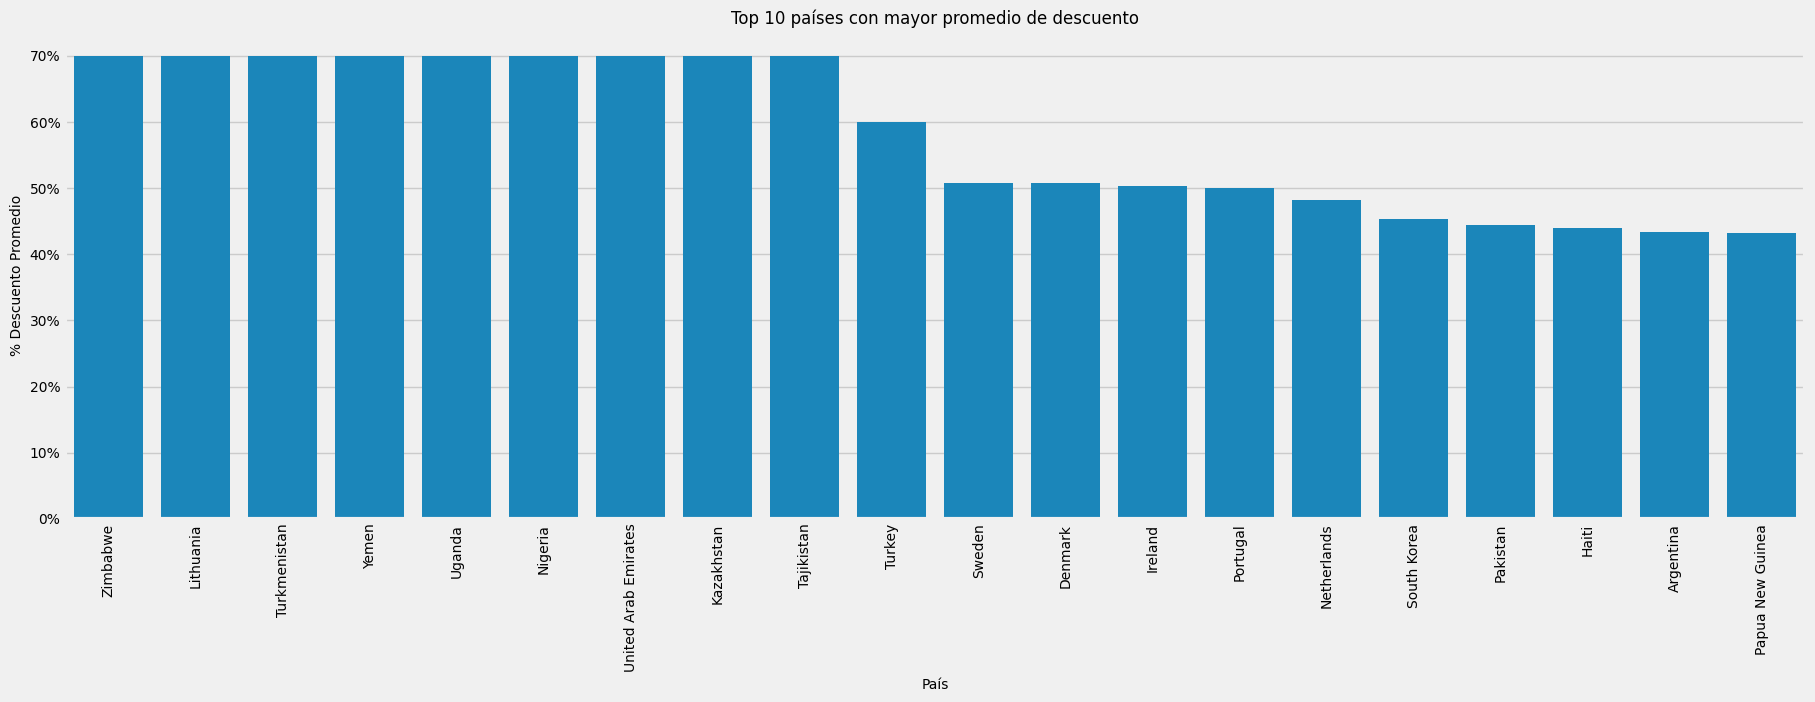

In [41]:
#TOP20 Countries by average discount
df_avg_discount = df.groupby('country')['discount'].mean().reset_index()
df_avg_discount = df_avg_discount.sort_values('discount', ascending=False)

# Seleccionar los 20 primeros países
top_20_countries = df_avg_discount.head(20)

# Crear el gráfico de barras
plt.figure(figsize=(20, 6))
sns.barplot(x='country', y='discount', data=top_20_countries)
plt.title('Top 10 países con mayor promedio de descuento')
plt.xlabel('País')
plt.ylabel('% Descuento Promedio')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
#mostrar eje x en porcentaje
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

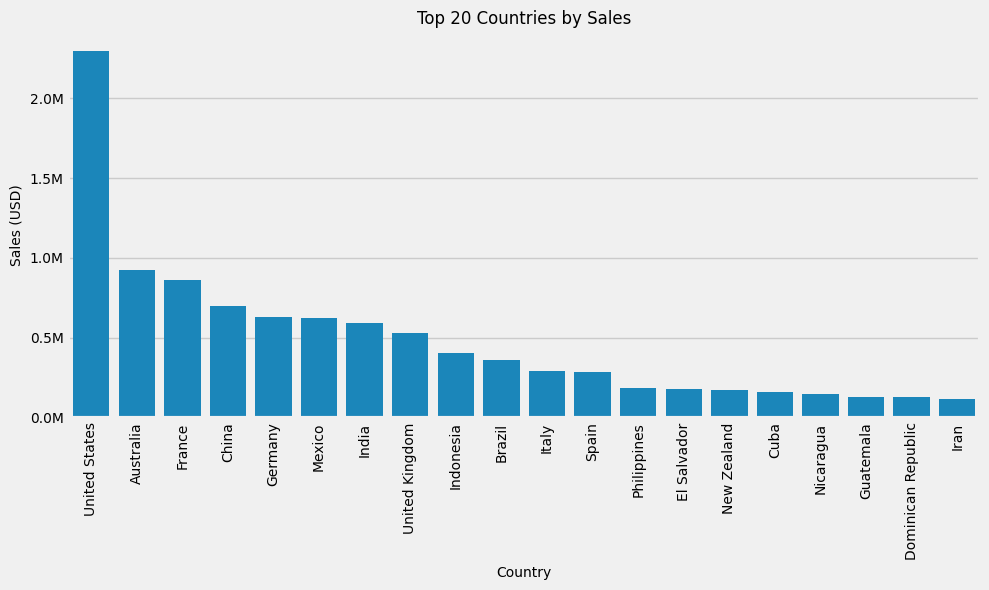

In [68]:
# Ventas por país (top 20)
top_countries = df.groupby('country')['sales'].sum().nlargest(20).reset_index()
sns.barplot(data=top_countries, x='country', y='sales')
plt.title('Top 20 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Sales (USD)')
# formatea eje y
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6)))
# formatea eje x
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

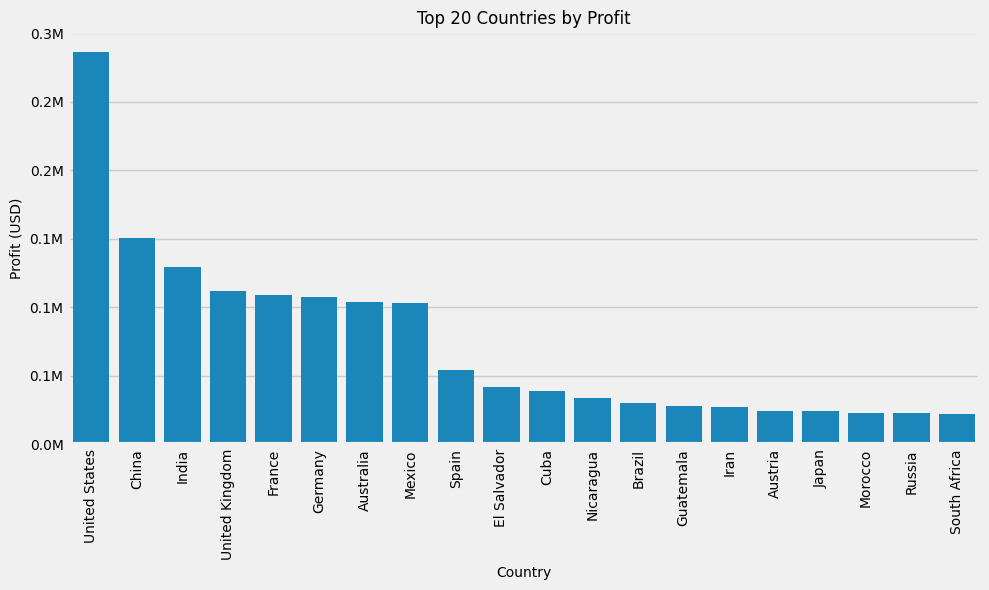

In [71]:
# Profit por país (top 20)
top_countries = df.groupby('country')['profit'].sum().nlargest(20).reset_index()
sns.barplot(data=top_countries, x='country', y='profit')
plt.title('Top 20 Countries by Profit')
plt.xlabel('Country')
plt.ylabel('Profit (USD)')
# formatea eje y
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6)))
# formatea eje x
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

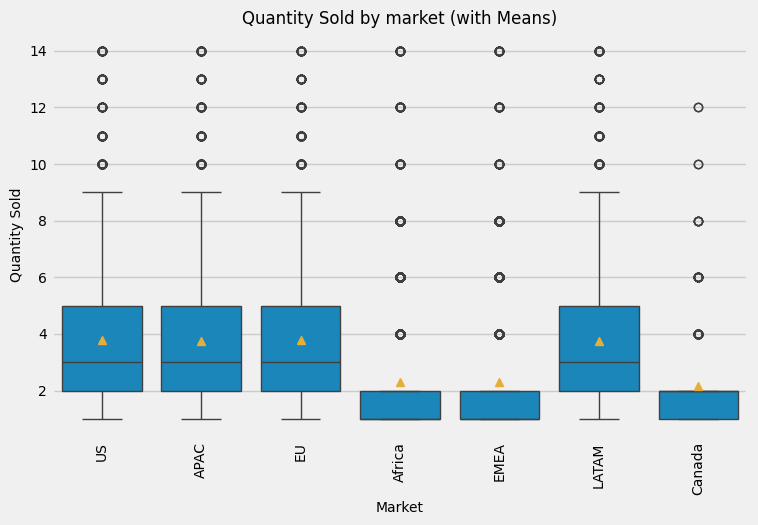

In [43]:
# Boxplot (quantity by market)
plt.figure(figsize=(8, 5))
sns.boxplot(x="market", y="quantity", showmeans=True, data=df)  # showmeans=True to display mean values
plt.xlabel('Market')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold by market (with Means)')
#tick rotation
plt.xticks(rotation=90)
plt.show()

### Análisis de categoría

Composición del catálogo de productos

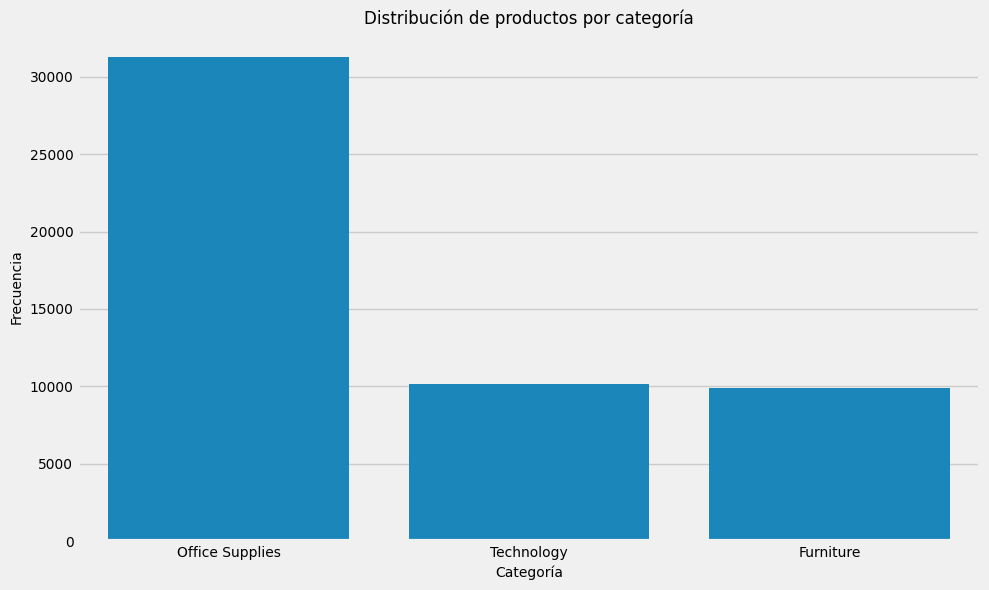

In [73]:
# Distribución de productos por categoría
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Distribución de ventas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [78]:
#count unique de product_id
df['product_id'].nunique()

10292

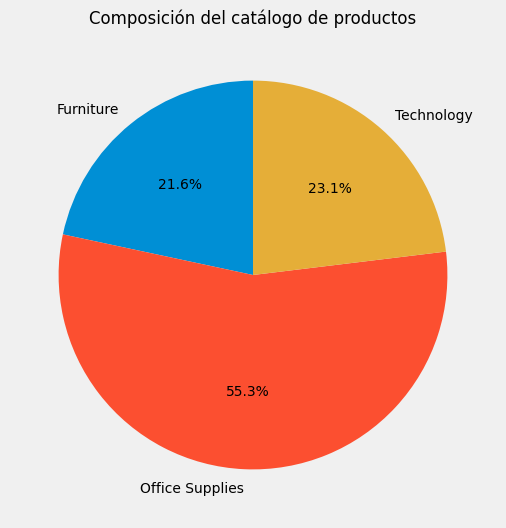

In [77]:
#Piechart composición del catálogo de productos
clientes_por_segmento = df.groupby('category')['product_id'].nunique()
plt.figure(figsize=(6, 6))
clientes_por_segmento.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Composición del catálogo de productos')
plt.ylabel('')
plt.show()

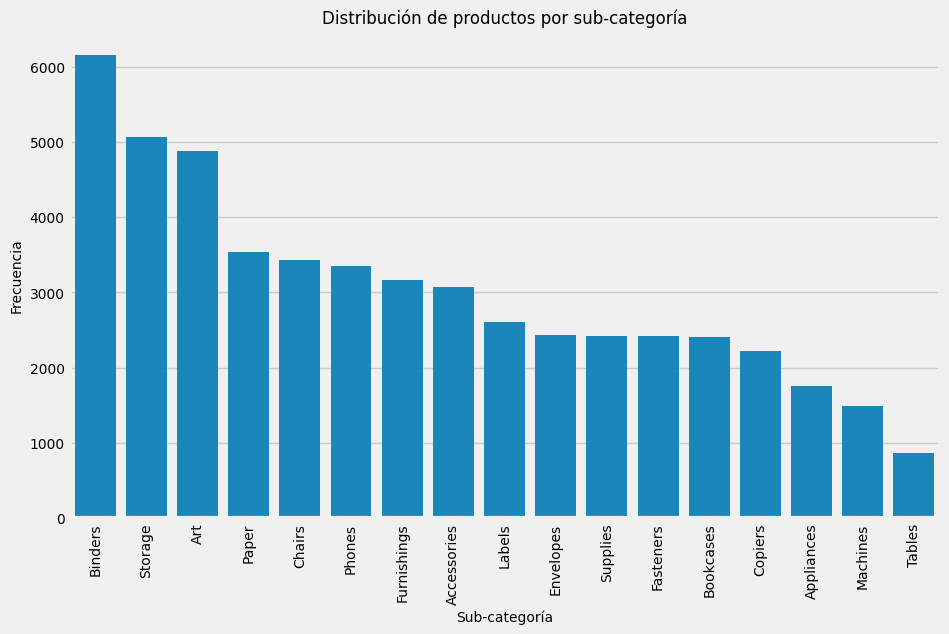

In [45]:
# Distribución de transacciones por subcategoría, ordenados de mayor a menor
sns.countplot(data=df, x='sub_category', order=df['sub_category'].value_counts().index)
plt.title('Distribución de transacciones por sub-categoría')
plt.xlabel('Sub-categoría')
plt.ylabel('Frecuencia')

# Mostrar los valores del eje x a 90 grados
plt.xticks(rotation=90)

plt.show()

Rendimiento de las categorías

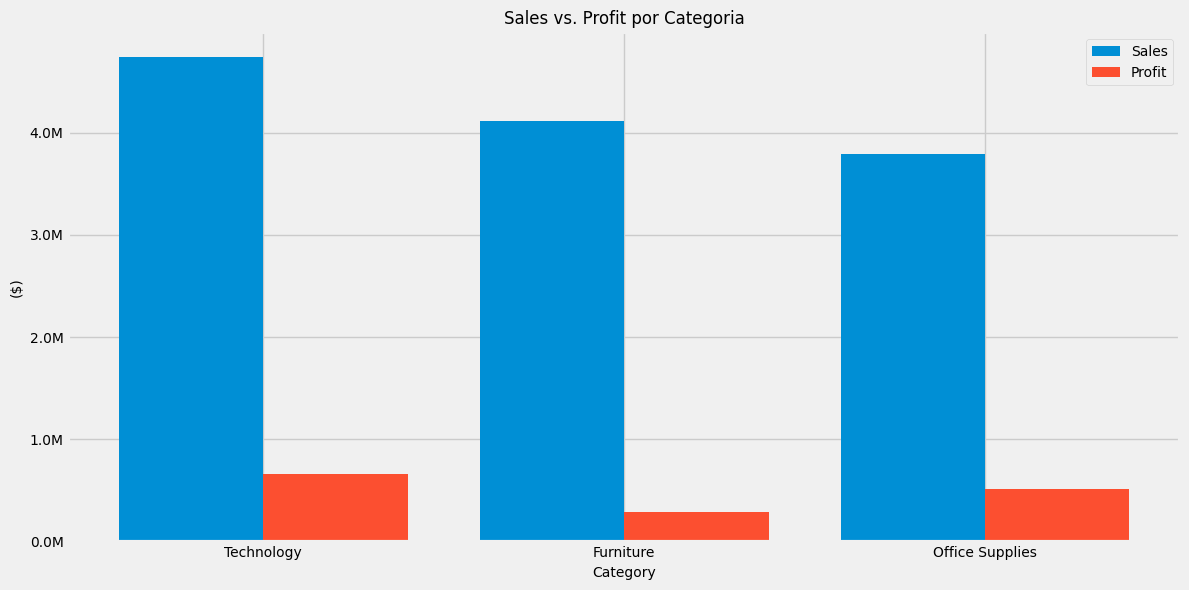

In [46]:
# ventas vs profit por categoría

df_summary = df.groupby('category')[['sales', 'profit']].sum().reset_index()
df_summary = df_summary.sort_values('sales', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(df_summary['category']))

ax.bar(index - bar_width / 2, df_summary['sales'], bar_width, label='Sales')
ax.bar(index + bar_width / 2, df_summary['profit'], bar_width, label='Profit')

ax.set_xlabel('Category')
ax.set_ylabel('($)')
ax.set_title('Sales vs. Profit por Categoria')
ax.set_xticks(index)
ax.set_xticklabels(df_summary['category'])
ax.legend()

# formato eje y (M)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6)))

plt.tight_layout()
plt.show()

#### Sub-categorías

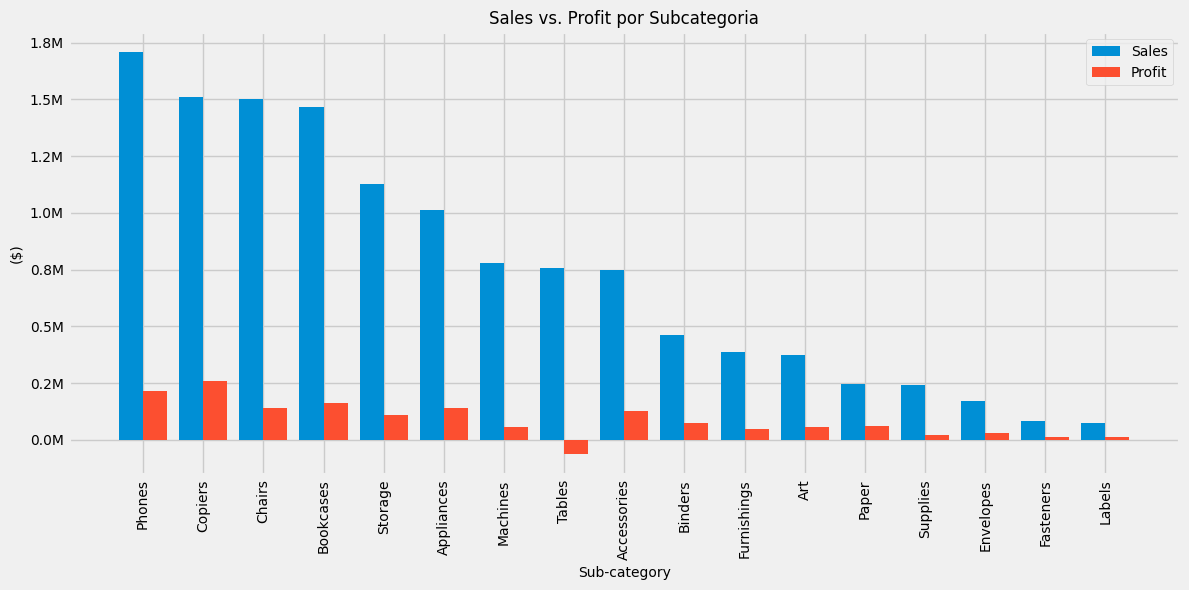

In [47]:
# ventas vs profit por subcat

df_summary = df.groupby('sub_category')[['sales', 'profit']].sum().reset_index()
df_summary = df_summary.sort_values('sales', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(df_summary['sub_category']))

ax.bar(index - bar_width / 2, df_summary['sales'], bar_width, label='Sales')
ax.bar(index + bar_width / 2, df_summary['profit'], bar_width, label='Profit')

ax.set_xlabel('Sub-category')
ax.set_ylabel('($)')
ax.set_title('Sales vs. Profit por Subcategoria')
ax.set_xticks(index)
ax.set_xticklabels(df_summary['sub_category'])
ax.legend()

# formato ejes
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6)))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

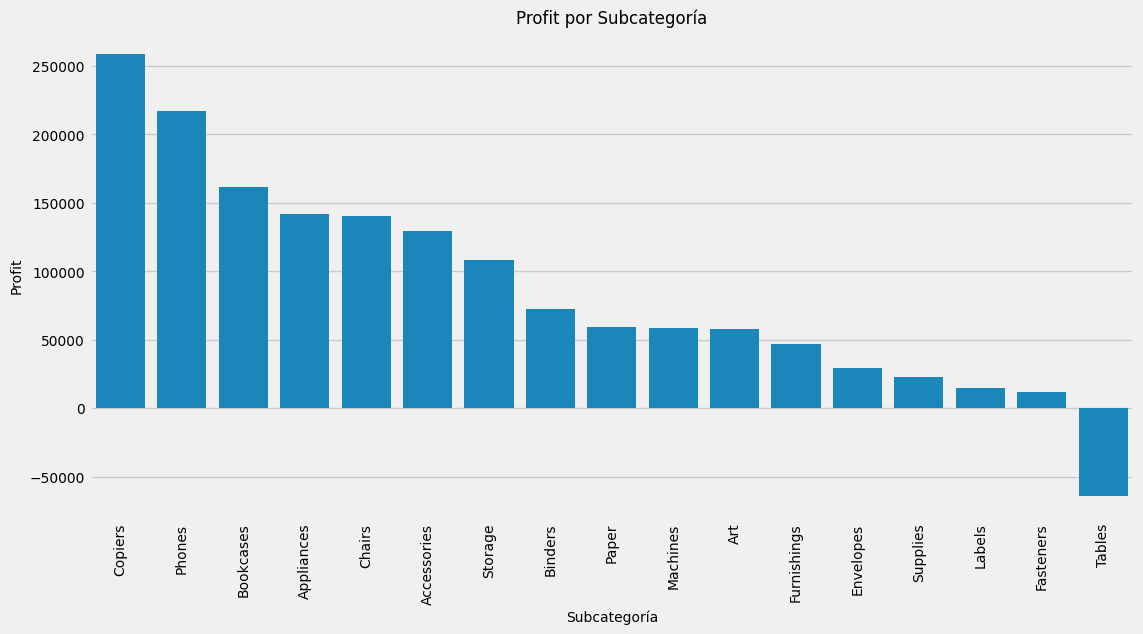

In [66]:
# Profit total por subcat
profit_by_subcategory = df.groupby('sub_category')['profit'].sum()
profit_by_subcategory = profit_by_subcategory.sort_values(ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_by_subcategory.index, y=profit_by_subcategory.values)
plt.title('Profit por Subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

La sub-categoría Tables presenta una rentabilidad negativa, y a pesar de haber contado con casi un millón de dólares en ventas, registró pérdidas de más de 50 mil dólares.

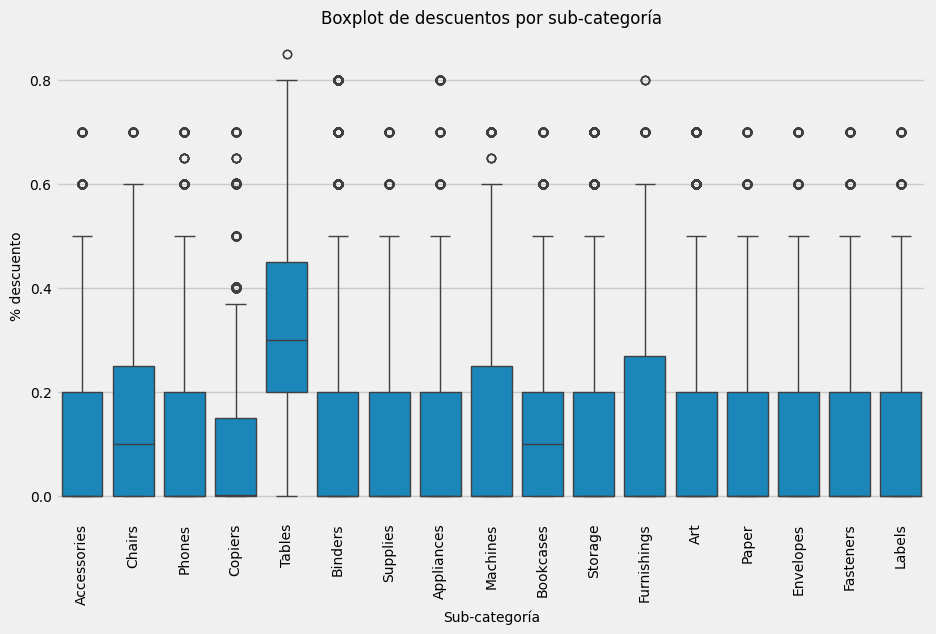

In [49]:
# Boxplot de descuentos por sub-categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x="sub_category", y="discount", data=df)
plt.title("Boxplot de descuentos por sub-categoría")
plt.xlabel("Sub-categoría")
plt.ylabel("% descuento")
plt.xticks(rotation=90)
plt.show()


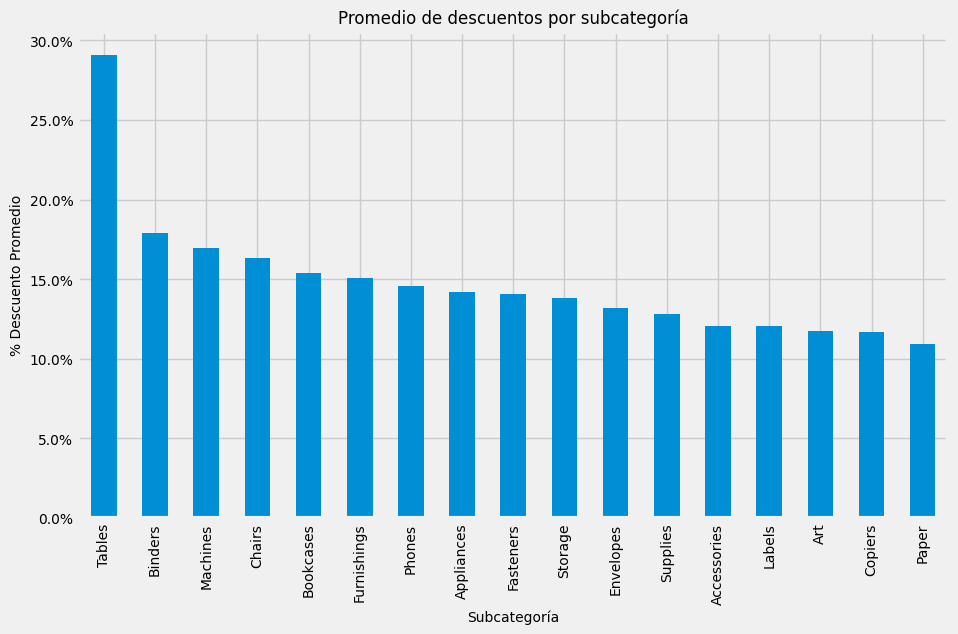

In [50]:
# Calcula el promedio de descuentos por subcategoría
avg_discount_by_subcategory = df.groupby('sub_category')['discount'].mean()
#ordenamos los resultados de mayor a menor
avg_discount_by_subcategory = avg_discount_by_subcategory.sort_values(ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
avg_discount_by_subcategory.plot(kind='bar')
plt.title('Promedio de descuentos por subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('% Descuento Promedio')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

Esta pérdida de rentabilidad se debe posiblemente al alto índice de descuentos que se aplican a estos productos, por lo que se sugiere revisar la estrategia promocional.

### Análisis de segmento


In [72]:
#unique count de customer_id
df['customer_id'].nunique()

1590

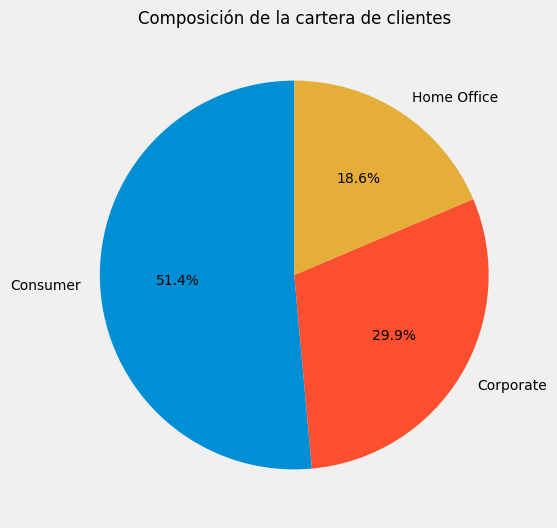

In [76]:
# Composición de la cartera de clientes
clientes_por_segmento = df.groupby('segment')['customer_id'].nunique()
plt.figure(figsize=(6, 6))
clientes_por_segmento.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Composición de la cartera de clientes')
plt.ylabel('')
plt.show()

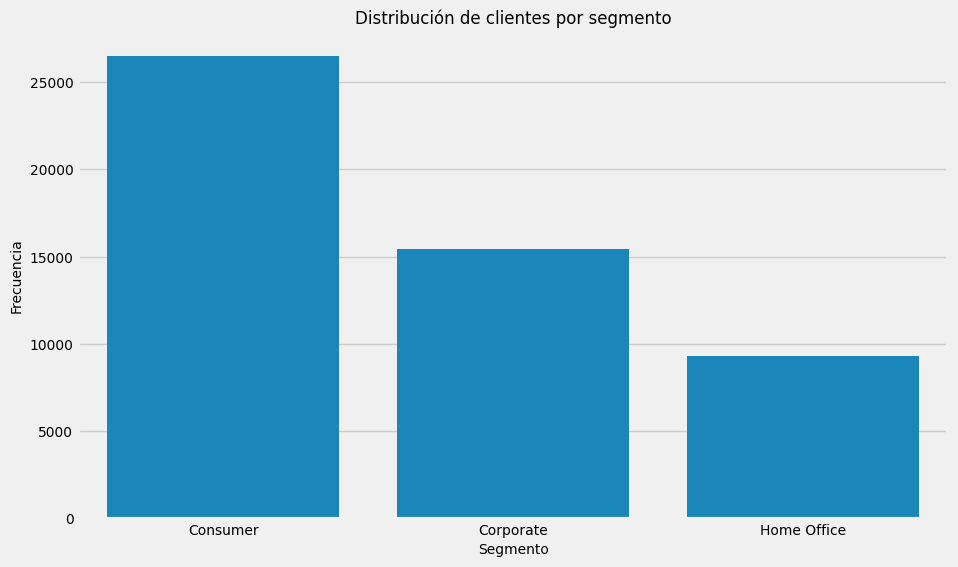

In [52]:
# Distribución de clientes por segmento
sns.countplot(data=df, x='segment', order=df['segment'].value_counts().index)
plt.title('Distribución de clientes por segmento')
plt.xlabel('Segmento')
plt.ylabel('Frecuencia')
plt.show()

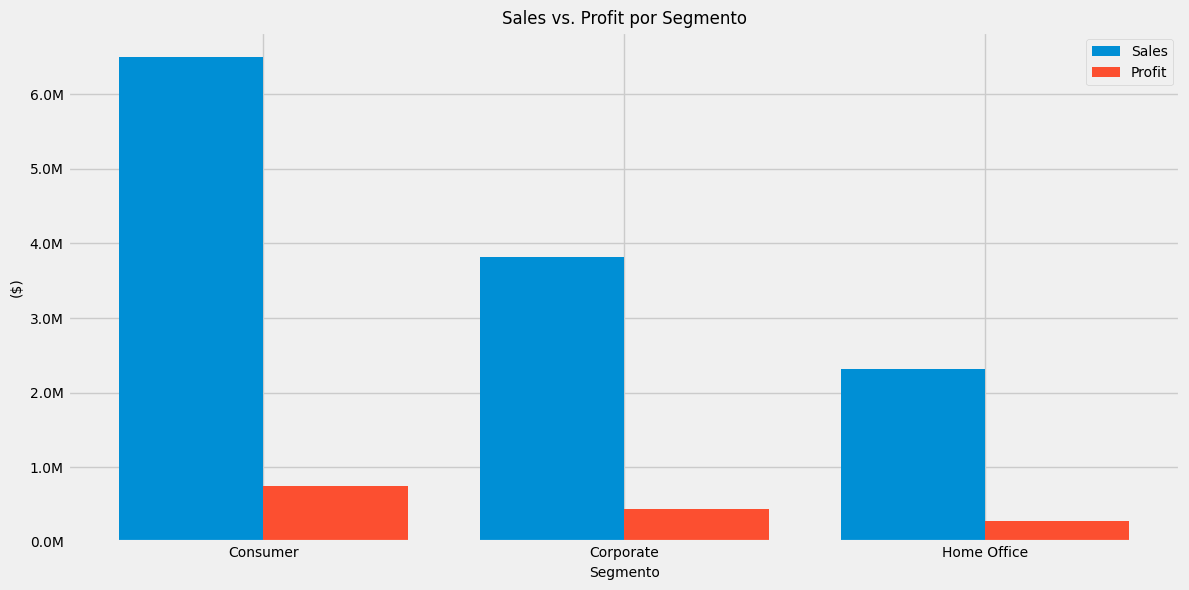

In [53]:
# sales vs. profit x segmento

df_summary = df.groupby('segment')[['sales', 'profit']].sum().reset_index()
df_summary = df_summary.sort_values('sales', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(df_summary['segment']))

ax.bar(index - bar_width / 2, df_summary['sales'], bar_width, label='Sales')
ax.bar(index + bar_width / 2, df_summary['profit'], bar_width, label='Profit')

ax.set_xlabel('Segmento')
ax.set_ylabel('($)')
ax.set_title('Sales vs. Profit por Segmento')
ax.set_xticks(index)
ax.set_xticklabels(df_summary['segment'])
ax.legend()

# formato eje y (M)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6)))

plt.tight_layout()
plt.show()

### Dispersión

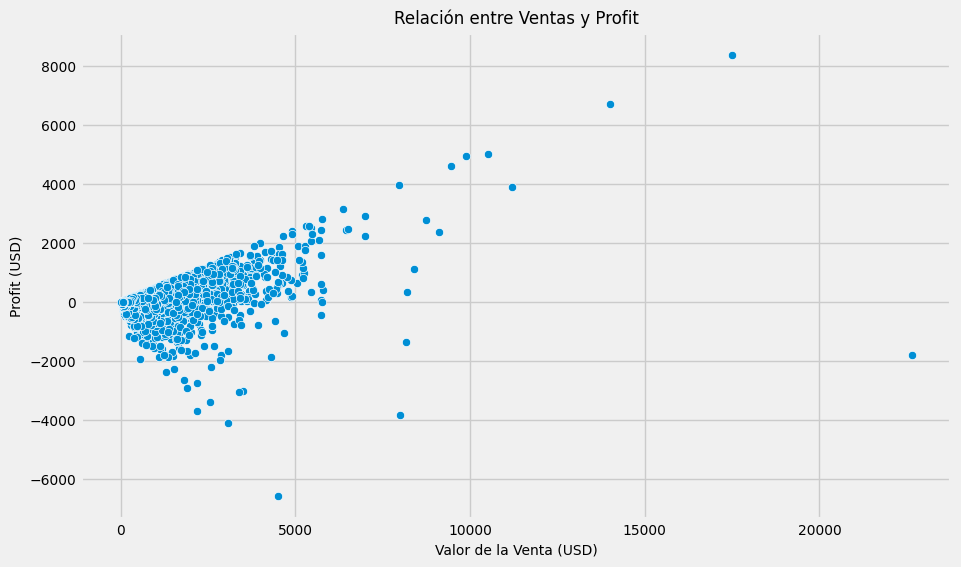

In [54]:
# Gráfico de dispersión entre ventas y profit
sns.scatterplot(data=df, x='sales', y='profit')
plt.title('Relación entre Ventas y Profit')
plt.xlabel('Valor de la Venta (USD)')
plt.ylabel('Profit (USD)')
plt.show()

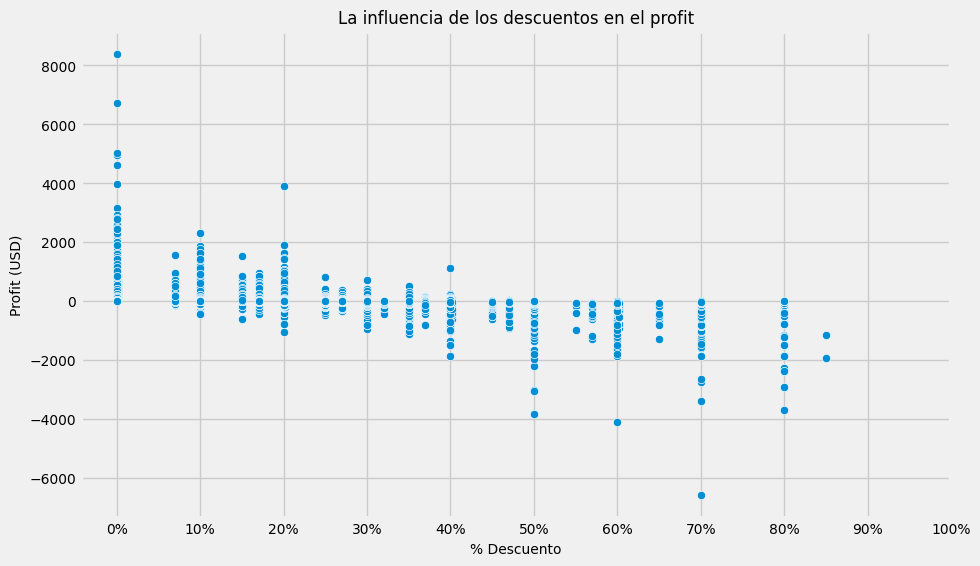

In [55]:
# Dispersión entre descuento y profit

sns.scatterplot(data=df, x='discount', y='profit')
# Formatear los ticks del eje x como porcentajes
plt.xticks(np.arange(0, 1.1, 0.1), ['{:.0%}'.format(x) for x in np.arange(0, 1.1, 0.1)])

# personalización
plt.title('La influencia de los descuentos en el profit')
plt.xlabel('% Descuento')
plt.ylabel('Profit (USD)')
# print
plt.show()

De forma esperable, existe una correlación negativa entre los descuentos y el margen de beneficio. Sin embargo, es notable que a partir de un descuento del 25%, la disminución del profit se vuelve más pronunciada, evidenciando los rendimientos marginales decrecientes de los esfuerzos promocionales. Es decir, cada punto porcentual adicional de descuento a partir de este umbral genera una reducción proporcionalmente mayor en el rendimiento.

### Series temporales

In [57]:
# import plotly express
import plotly.express as px

In [62]:
# evolution of sales
df['order_date'] = pd.to_datetime(df['order_date'])
df_diario = df.groupby(pd.Grouper(key='order_date', freq='D'))['sales'].sum().reset_index()

fig = px.line(df_diario, x='order_date', y='sales',
              title='Evolución de las Ventas Diarias',
              labels={'order_date':'Fecha', 'sales':'Ventas Diarias'})

fig.show()

In [64]:
# evolution of profit
df['order_date'] = pd.to_datetime(df['order_date'])
df_diario = df.groupby(pd.Grouper(key='order_date', freq='D'))['profit'].sum().reset_index()

fig = px.line(df_diario, x='order_date', y='profit',
              title='Evolución del profit',
              labels={'order_date':'Fecha', 'profit':'Profit'})

fig.show()

In [63]:
# ventas x categoría
df['order_date'] = pd.to_datetime(df['order_date'])
df_diario = df.groupby(['order_date', 'category'])['sales'].sum().reset_index()

fig = px.line(df_diario, x='order_date', y='sales', color='category',
              title='Evolución de las Ventas Diarias por Categoría')

fig.show()

In [58]:
# Evolución de las ventas por categoría -- comparativa por año
df_sales_category = df.groupby(['year', 'month', 'category'])['sales'].sum().reset_index()
fig = px.line(df_sales_category, x='month', y='sales', color='category',
              facet_row='year', title='Evolución de las ventas por categoría')
fig.show()

In [65]:
# Evolución del profit por categoría -- comparativa por año
df_sales_category = df.groupby(['year', 'month', 'category'])['profit'].sum().reset_index()
fig = px.line(df_sales_category, x='month', y='profit', color='category',
              facet_row='year', title='Evolución del profit por categoría')
fig.show()

## Conclusiones del EDA

A partir del análisis exploratorio se extraen las siguientes conclusiones:

- **Rendimientos marginales decrecientes en los descuentos**: Los descuentos, aunque inicialmente pueden estimular las ventas, presentan rendimientos marginales decrecientes. A partir de un descuento del 25%, la reducción en el margen de beneficio se acelera significativamente, evidenciando que cada punto porcentual adicional de descuento aporta cada vez menos a las ganancias. Esto sugiere que los esfuerzos promocionales más allá de este umbral podrían estar generando un impacto negativo en la rentabilidad. Se recomienda establecer un límite máximo de descuento en el rango del 20-25%.

- **Limitando los descuentos en mesas para maximizar el profit:** La subcategoría "Tables" tiene una estrategia de descuentos más agresiva que el resto (con promedios de descuentos de casi el 30%), lo que está erosionando sus márgenes de ganancia (a pesar de haber contado con casi un millón de dólares en ventas, registró pérdidas de más de 50 mil dólares). Se recomienda analizar los factores que impulsan los altos descuentos en "Tables" y ajustar la estrategia para alcanzar un equilibrio entre ventas y rentabilidad.

- La presencia de outliers positivos en las ventas de USA sugiere la existencia de **nichos de consumidores altamente rentables**. Identificar y atender las necesidades específicas de estos segmentos puede generar un crecimiento significativo en las ventas.

- **EMEA pierde rentabilidad vs Africa** por los altos promedios de descuentos que aplican países como Lithuania, Turkmenistan, Emiratos Árabes, Yemen, Kazakhstan, Tajikistan y Turquía. Esto puede significar que estos mercados requieren más acciones promocionales para estimular a los consumidores, por lo que se recomienda evaluar el impacto incremental de los descuentos sobre las ventas en estos países.

- **Estacionalidad**: Se detectan picos de ventas en distintos momentos del año, impulsados principalmente por la categoría Technology. Si bien requiere mayor research, podemos estimar qye hay fechas comerciales (black friday, cyper-monday, etc) que conduce a un aumento en las ventas de productos electrónicos.

Link a la presentación ejecutiva: [URL](https://docs.google.com/presentation/d/1BUIoJoa1pO6nQuFYg6ZQ4IctGYJErU68eLcdA688KvM/edit?usp=drive_link)